In this competition, a classification algorithm is supposed to accurately identify which customers have the most potential business value for Red Hat based on their characteristics and activities.

For more information, please visit:
https://www.kaggle.com/c/predicting-red-hat-business-value

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

## Loading the dataset

In [14]:
print("Read people.csv...")
people = pd.read_csv(r'..\RedHat\people.csv',
                       dtype={'people_id': np.str,
                              'activity_id': np.str,
                              'char_38': np.int32},
                       parse_dates=['date'])


Read people.csv...


In [15]:
print("Load train.csv...")
train = pd.read_csv(r'..\RedHat\act_train.csv',
                        dtype={'people_id': np.str,
                               'activity_id': np.str,
                               'outcome': np.int8},
                        parse_dates=['date'])


Load train.csv...


In [16]:
print("Load test.csv...")
test = pd.read_csv(r'..\RedHat\act_test.csv',
                       dtype={'people_id': np.str,
                              'activity_id': np.str},
                       parse_dates=['date'])

Load test.csv...


## Review input features

In [6]:
print ("\n\n---------------------")
print ("TRAIN SET INFORMATION")
print ("---------------------")
print ("Shape of training set:", train.shape, "\n")
print ("Column Headers:", list(train.columns.values), "\n")
print (train.dtypes)



---------------------
TRAIN SET INFORMATION
---------------------
Shape of training set: (2197291, 15) 

Column Headers: ['people_id', 'activity_id', 'date', 'activity_category', 'char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 'char_10', 'outcome'] 

people_id                    object
activity_id                  object
date                 datetime64[ns]
activity_category            object
char_1                       object
char_2                       object
char_3                       object
char_4                       object
char_5                       object
char_6                       object
char_7                       object
char_8                       object
char_9                       object
char_10                      object
outcome                        int8
dtype: object


In [7]:
import re
missing_values = []
nonumeric_values = []

print ("TRAINING SET INFORMATION")
print ("========================\n")

for column in train:
    # Find all the unique feature values
    uniq = train[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

TRAINING SET INFORMATION

'people_id' has 151295 unique values
~~Listing up to 10 unique values~~
['ppl_100' 'ppl_100002' 'ppl_100003' 'ppl_100006' 'ppl_100013' 'ppl_100019'
 'ppl_100025' 'ppl_100028' 'ppl_100029' 'ppl_100032']

-----------------------------------------------------------------------

'activity_id' has 2197291 unique values
~~Listing up to 10 unique values~~
['act2_1734928' 'act2_2434093' 'act2_3404049' 'act2_3651215' 'act2_4109017'
 'act2_898576' 'act2_1233489' 'act2_1623405' 'act2_1111598' 'act2_1177453']

-----------------------------------------------------------------------

'date' has 411 unique values
~~Listing up to 10 unique values~~
['2023-08-26T01:00:00.000000000+0100' '2022-09-27T01:00:00.000000000+0100'
 '2023-08-04T01:00:00.000000000+0100' '2022-11-23T00:00:00.000000000+0000'
 '2023-02-07T00:00:00.000000000+0000' '2023-06-28T01:00:00.000000000+0100'
 '2022-08-10T01:00:00.000000000+0100' '2023-03-02T00:00:00.000000000+0000'
 '2022-09-13T01:00:00.000000000+0

In [8]:
print ("\n\n---------------------")
print ("PEOPLE SET INFORMATION")
print ("---------------------")
print ("Shape of training set:", people.shape, "\n")
print ("Column Headers:", list(people.columns.values), "\n")
print (people.dtypes)



---------------------
PEOPLE SET INFORMATION
---------------------
Shape of training set: (189118, 41) 

Column Headers: ['people_id', 'char_1', 'group_1', 'char_2', 'date', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 'char_10', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35', 'char_36', 'char_37', 'char_38'] 

people_id            object
char_1               object
group_1              object
char_2               object
date         datetime64[ns]
char_3               object
char_4               object
char_5               object
char_6               object
char_7               object
char_8               object
char_9               object
char_10                bool
char_11                bool
char_12                bool
char_13      

In [9]:
import re
missing_values = []
nonumeric_values = []

print ("PEOPLE SET INFORMATION")
print ("========================\n")

for column in people:
    # Find all the unique feature values
    uniq = people[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(people[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

PEOPLE SET INFORMATION

'people_id' has 189118 unique values
~~Listing up to 10 unique values~~
['ppl_100' 'ppl_100002' 'ppl_100003' 'ppl_100004' 'ppl_100006' 'ppl_10001'
 'ppl_100010' 'ppl_100013' 'ppl_100019' 'ppl_100025']

-----------------------------------------------------------------------

'char_1' has 2 unique values
['type 2' 'type 1']

-----------------------------------------------------------------------

'group_1' has 34224 unique values
~~Listing up to 10 unique values~~
['group 17304' 'group 8688' 'group 33592' 'group 22593' 'group 6534'
 'group 25417' 'group 4204' 'group 45749' 'group 36096' 'group 18035']

-----------------------------------------------------------------------

'char_2' has 3 unique values
['type 2' 'type 3' 'type 1']

-----------------------------------------------------------------------

'date' has 1196 unique values
~~Listing up to 10 unique values~~
['2021-06-29T01:00:00.000000000+0100' '2021-01-06T00:00:00.000000000+0000'
 '2022-06-10T01:00:00.0

#### So we have 2197291 rows and 15 columns in train dataset and 189118 rows and 41 columns in people dataset.
There are no missing values. 
All variables are categorical, with the exception of 'char_38' in the people file, which is a continuous numerical variable.
All the data is categorical except the outcome which contains yes and no . 
According to submission file , we only need activity_id and outcome.
in the dataset, people_id' has 151295 unique values and no missing values, therefore approximately 14.5 activity_id is associated with each person. There are 7 different types of activities.
All corresponding activity characteristics have 2039676 missing values except char_10 .
Each row in the activity file represents a unique activity performed by a person on a certain date. 

Type 1 activities are different from type 2-7 activities because there are more known characteristics associated with type 1 activities (nine in total) than type 2-7 activities (which have only one associated characteristic).

Also, each activity has nan and type 'int'. We will split the activities at type and use the unique integer as the numerical value.

## Process the dataframe

In [17]:
print ("Processing...")

for table in [train, test]:
        table['year'] = table['date'].dt.year
        table['month'] = table['date'].dt.month
        table['day'] = table['date'].dt.day
        table.drop('date', axis=1, inplace=True)
        table['activity_category'] = table['activity_category'].str.lstrip('type ').astype(np.int32)
        for i in range(1, 11):
            table['char_' + str(i)].fillna('type 0', inplace=True)
            table['char_' + str(i)] = table['char_' + str(i)].str.lstrip('type ').astype(np.int32)

people['year'] = people['date'].dt.year
people['month'] = people['date'].dt.month
people['day'] = people['date'].dt.day
people.drop('date', axis=1, inplace=True)
people['group_1'] = people['group_1'].str.lstrip('group ').astype(np.int32)
for i in range(1, 10):
    people['char_' + str(i)] = people['char_' + str(i)].str.lstrip('type ').astype(np.int32)
for i in range(10, 38):
    people['char_' + str(i)] = people['char_' + str(i)].astype(np.int32)




Processing...


According to kaggle, there is a suggestion to join the train and people files together into a single data set to develop a predictive model with this data. The two files can be joined together using person_id as the common key. 

In [18]:
print("Merge...")
train = pd.merge(train, people, how='left', on='people_id', left_index=True)
train.fillna(0.0, inplace=True)
test = pd.merge(test, people, how='left', on='people_id', left_index=True)
test.fillna(0.0, inplace=True)


Merge...


We simply drop the people_id attribute, since we do not expect it to be informative about the outcome status.


In [19]:
train = train.drop(['people_id'], axis=1)

In [20]:
train.head(2)

activity_id  activity_category  char_1_x  char_2_x  char_3_x  char_4_x  \
0  act2_1734928                  4         0         0         0         0   
0  act2_2434093                  2         0         0         0         0   

   char_5_x  char_6_x  char_7_x  char_8_x  ...    char_32  char_33  char_34  \
0         0         0         0         0  ...          0        0        1   
0         0         0         0         0  ...          0        0        1   

   char_35  char_36  char_37  char_38  year_y  month_y  day_y  
0        1        1        0       36    2021        6     29  
0        1        1        0       36    2021        6     29  

[2 rows x 58 columns]

## Summary Statistics

In [21]:
train.describe()

activity_category      char_1_x      char_2_x      char_3_x  \
count       2.197291e+06  2.197291e+06  2.197291e+06  2.197291e+06   
mean        2.997433e+00  4.972751e-01  3.721710e-01  2.820587e-01   
std         1.314068e+00  2.576469e+00  1.850443e+00  1.166786e+00   
min         1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%         2.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%         3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%         4.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max         7.000000e+00  5.200000e+01  3.200000e+01  1.100000e+01   

           char_4_x      char_5_x      char_6_x      char_7_x      char_8_x  \
count  2.197291e+06  2.197291e+06  2.197291e+06  2.197291e+06  2.197291e+06   
mean   2.007781e-01  2.567903e-01  1.442121e-01  1.832220e-01  3.784223e-01   
std    7.760891e-01  1.104695e+00  5.628843e-01  7.826314e-01  1.585741e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    7.000000e+00  7.000000e+00  5.000000e+00  8.000000e+00  1.800000e+01   

           char_9_x      ...            char_32       char_33       char_34  \
count  2.197291e+06      ...       2.197291e+06  2.197291e+06  2.197291e+06   
mean   5.165215e-01      ...       2.680014e-01  2.140777e-01  3.458008e-01   
std    2.280433e+00      ...       4.429184e-01  4.101811e-01  4.756288e-01   
min    0.000000e+00      ...       0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00      ...       0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00      ...       0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00      ...       1.000000e+00  0.000000e+00  1.000000e+00   
max    1.900000e+01      ...       1.000000e+00  1.000000e+00  1.000000e+00   

            char_35       char_36       char_37       char_38        year_y  \
count  2.197291e+06  2.197291e+06  2.197291e+06  2.197291e+06  2.197291e+06   
mean   2.013311e-01  3.282656e-01  2.708326e-01  4.998051e+01  2.021796e+03   
std    4.009950e-01  4.695821e-01  4.443899e-01  3.608557e+01  8.224093e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.020000e+03   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.021000e+03   
50%    0.000000e+00  0.000000e+00  0.000000e+00  5.900000e+01  2.022000e+03   
75%    0.000000e+00  1.000000e+00  1.000000e+00  8.200000e+01  2.022000e+03   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+02  2.023000e+03   

            month_y         day_y  
count  2.197291e+06  2.197291e+06  
mean   6.784896e+00  1.581997e+01  
std    3.433367e+00  9.212925e+00  
min    1.000000e+00  1.000000e+00  
25%    4.000000e+00  8.000000e+00  
50%    7.000000e+00  1.600000e+01  
75%    1.000000e+01  2.500000e+01  
max    1.200000e+01  3.100000e+01  

[8 rows x 57 columns]

## Process the dataset for Machine Learning

In [22]:
#Separate label and data
Y = train['outcome']
X = train.drop(['outcome'], axis=1)

Get the train data features, skipping the first column 'activity_id' as it is still object dtype()

In [23]:
X = X.iloc[:,1:]

## PCA Visualization

In [32]:
from sklearn.decomposition import PCA, KernelPCA
components = 8
pca = PCA(n_components=components).fit(X)

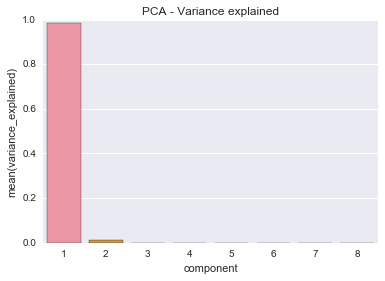

In [33]:
#Show explained variance for each component
pca_variance_explained_df = pd.DataFrame({
    "component": np.arange(1, components+1),
    "variance_explained": pca.explained_variance_ratio_            
    })

ax = sns.barplot(x='component', y='variance_explained', data=pca_variance_explained_df)
ax.set_title("PCA - Variance explained")
plt.show()

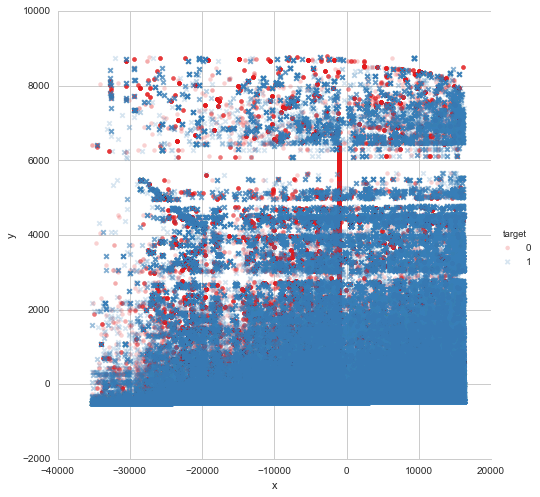

In [51]:
sns.set_style('whitegrid')
X_pca = pd.DataFrame(pca.transform(X)[:,:2])
X_pca['target'] = Y.values
X_pca.columns = ["x", "y", "target"]

sns.lmplot('x','y', 
           data=X_pca, 
           hue="target", 
           fit_reg=False, 
           markers=["o", "x"], 
           palette="Set1", 
           size=7,
           scatter_kws={"alpha": .2}
          )      
          
          
plt.show()

## Evaluating Algorithms

### Random Forest

In [55]:
#Create the random forest object:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
# Fit the model to our training data
rfc = rfc.fit(X, Y)
score = rfc.score(X, Y)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 1.0'

### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)
# Fit the model to our training data
lr = lr.fit(X, Y)
score = lr.score(X, Y)
"Mean accuracy of Logistic Regression: {0}".format(score)

'Mean accuracy of Logistic Regression: 0.8219407443074221'

### Linear Discriminant Analysis

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# Fit the model to our training data
lda = lda.fit(X, Y)
score = lda.score(X, Y)
"Mean accuracy of Linear Discriminant Analysis: {0}".format(score)

'Mean accuracy of Linear Discriminant Analysis: 0.8353176707136196'

### Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import  GradientBoostingClassifier
gbc = GradientBoostingClassifier()
# Fit the model to our training data
gbc = gbc.fit(X, Y)
score = gbc.score(X, Y)
"Mean accuracy of GradientBoostingClassifier: {0}".format(score)

'Mean accuracy of GradientBoostingClassifier: 0.8654192821979428'

### Ada Boost Classifier

In [59]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
# Fit the model to our training data
abc = abc.fit(X, Y)
score = abc.score(X, Y)
"Mean accuracy of AdaBoostClassifier: {0}".format(score)

'Mean accuracy of AdaBoostClassifier: 0.8525102046110415'

### Analysis shows that Random Forest Classifier is the best for training with the accuracy of 1.

## Prepare the test dataset for prediction

In [26]:
#drop the people_id
test = test.drop(['people_id'], axis=1)


In [27]:
# Get the test data features, skipping the first column 'PassengerId'
test_x = test.iloc[:, 1:]


In [29]:
# Predict the outcome values for the test data
test_y = list(map(int, rfc.predict(test_x)))

In [30]:
#file for submission
test['outcome'] = test_y
test[['activity_id', 'outcome']] \
    .to_csv('results-rfc.csv', index=False)